In [1]:
import torch
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import torch.nn as nn

100%|██████████| 170M/170M [00:05<00:00, 28.5MB/s]


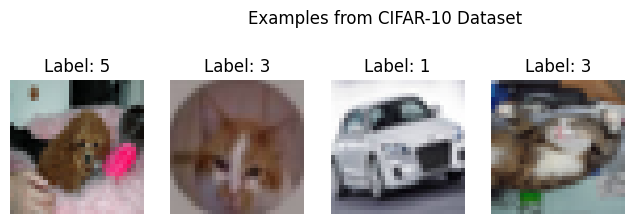

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

dataiter = iter(trainloader)
images, labels = next(dataiter)

plt.figure(figsize=(10, 5))
for i in range(images.shape[0]):
    plt.subplot(2, 5, i + 1)
    img = images[i].numpy().squeeze() * 0.5 + 0.5
    img = np.transpose(img, (1, 2, 0))
    plt.imshow(img)
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')
plt.suptitle('Examples from CIFAR-10 Dataset')
plt.show()

In [3]:
images[0].size()

torch.Size([3, 32, 32])

In [4]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)

        self.fc1 = nn.Linear(in_features=64 * 8 * 8, out_features=128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))

        x = x.view(-1, 64 * 8 * 8)

        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x

In [5]:
model = SimpleCNN()
print(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 5
train_losses, train_accuracies = [], []
print("\nНачало обучения...")

for epoch in range(epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in trainloader:
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    print(f"Эпоха [{epoch+1}/{epochs}], Потери: {train_loss:.4f}, Точность на обучении: {train_accuracy:.2f}%")

print("Обучение завершено!")


SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

Начало обучения...
Эпоха [1/5], Потери: 1.2670, Точность на обучении: 54.35%
Эпоха [2/5], Потери: 0.9544, Точность на обучении: 66.28%
Эпоха [3/5], Потери: 0.8317, Точность на обучении: 70.96%
Эпоха [4/5], Потери: 0.7437, Точность на обучении: 73.91%
Эпоха [5/5], Потери: 0.6613, Точность на обучении: 76.77%
Обучение завершено!



Точность модели на 10000 тестовых изображениях: 68.27 %


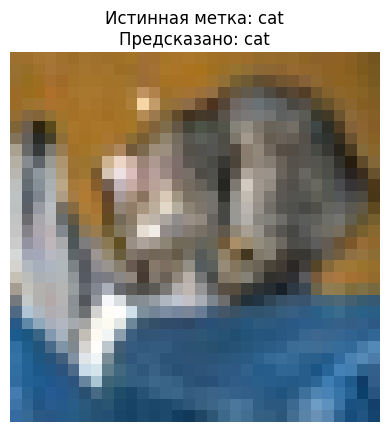

In [8]:
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'\nТочность модели на {total} тестовых изображениях: {100 * correct / total:.2f} %')


dataiter = iter(testloader)
images, labels = next(dataiter)

sample_image = images[0]
true_label = labels[0]

output = model(sample_image.unsqueeze(0))
_, predicted_class = torch.max(output.data, 1)

# Transpose the image data for displaying
plt.imshow(np.transpose(sample_image.numpy().squeeze() * 0.5 + 0.5, (1, 2, 0)))
# Update the title to show class names
plt.title(f'Истинная метка: {classes[true_label.item()]}\nПредсказано: {classes[predicted_class.item()]}')
plt.axis('off')
plt.show()

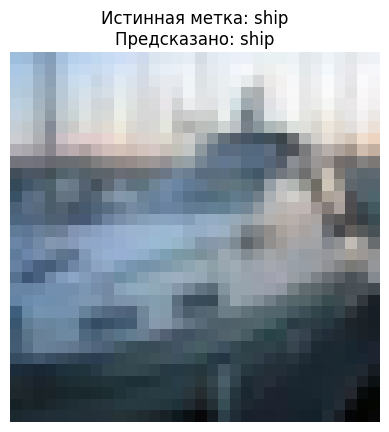

In [22]:
dataiter = iter(testloader)
images, labels = next(dataiter)

sample_image = images[2]
true_label = labels[2]

output = model(sample_image.unsqueeze(0))
_, predicted_class = torch.max(output.data, 1)

plt.imshow(np.transpose(sample_image.numpy().squeeze() * 0.5 + 0.5, (1, 2, 0)))
plt.title(f'Истинная метка: {classes[true_label.item()]}\nПредсказано: {classes[predicted_class.item()]}')
plt.axis('off')
plt.show()

In [24]:
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)